Taken from: https://www.geeksforgeeks.org/ml-t-distributed-stochastic-neighbor-embedding-t-sne-algorithm/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

d = mnist.data  
l = mnist.target  

df = pd.DataFrame(d)
df['label'] = l  

In [3]:
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)


(70000, 784)


In [4]:
data_1000 = standardized_data[0:1000, :]
labels_1000 = l[0:1000]

model = TSNE(n_components = 2, random_state = 0)

tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))


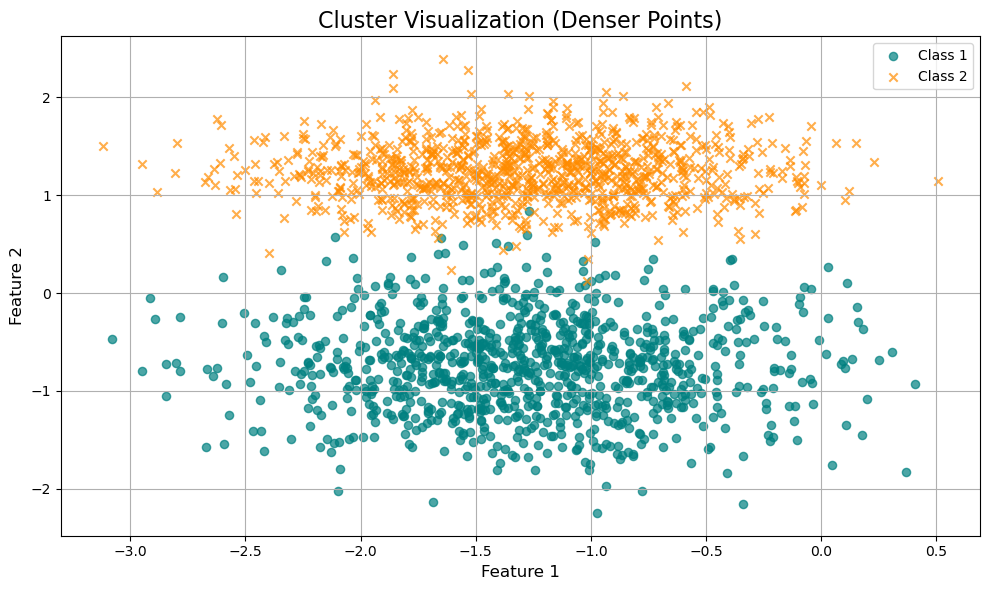

In [ ]:
# plt.scatter(data=tsne_df, x = 'Dim_1', y = 'Dim_2', c='label', cmap='tab10', alpha=0.7)
# plt.show()

tsne_df['label'] = tsne_df['label'].astype(int)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    x=tsne_df['Dim_1'],
    y=tsne_df['Dim_2'],
    c=tsne_df['label'],
    cmap='tab10',  # Good for 10 distinct classes like MNIST digits
    alpha=0.7
)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.title('t-SNE Visualization of MNIST (1000 samples)')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()
